#Frozen Lake Environment
Goal of the agent is: To navigate through the frozen lake and find the goal without falling to the holes.

There are:
- 16 states 1 per square
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (S-start, F-frozen, H-hole, G-goal)

In [5]:
import gym #Gym is OpenAI toolkit for developing and comparing Reinforcement Learning Algorithms
import numpy as np
import time

#Loading the environment
env = gym.make('FrozenLake-v1') #I will use the FrozenLake environment

states = env.observation_space.n
actions = env.action_space.n

Q = np.zeros((states, actions)) #Create a matrix with all 0s

episodes = 15000 #how many times to run the environment from the beginning
max_steps = 100 #max number of steps allowed for each run of the environment

learning_rate = 0.81
gamma = 0.96

render = False

epsilon = 0.9 # 90% chance of picking a random action

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


#Picking an action
We can pick an action using one of two ways:
1. Pick an action randomly
2. Pick based on the current Q-Table to find the best action

Epsilon - variable that tells us a probability of selecting a random action. Epsilon's value starts offvery high and slowly decrease as the agents learns more about the environment

In [6]:
rewards = []
for episode in range(episodes):

  state = env.reset() #reset environment to the inintial state
  for _ in range(max_steps):
    if render:
      env.render()

    if np.random.uniform(0,1) < epsilon: # Check if the randomly selected value is less than epsilon
      action = env.action_space.sample() #returns the random action from the action space
    else:
      action =np.argmax(Q[state, :]) # Use q-table to choose  the best action on the current state, max argument from the current state row

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + learning_rate * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}: " )

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[3.36581801e-01 2.37615636e-02 1.79162840e-02 2.26743076e-02]
 [3.16051786e-03 1.12085860e-03 9.17572368e-03 1.21954030e-01]
 [5.92469848e-03 5.88399484e-03 9.15434765e-03 1.68806005e-01]
 [2.57999419e-03 2.25526828e-04 7.78624261e-03 1.32505814e-01]
 [4.04650924e-01 1.28809966e-03 1.14586111e-02 2.03151800e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.32552428e-03 2.01393335e-07 1.92266404e-07 1.68145905e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.17319066e-03 3.51294744e-03 2.94554786e-03 3.05945920e-01]
 [6.29291916e-03 7.33520394e-01 3.44475441e-03 4.33014901e-03]
 [8.08949335e-01 5.04677708e-04 3.66154220e-04 6.63689401e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.76695788e-02 3.29763441e-02 9.21218107e-01 2.28221091e-02]
 [6.94470569e-02 9.93812557e-01 1.37486207e-01 1.66160043e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

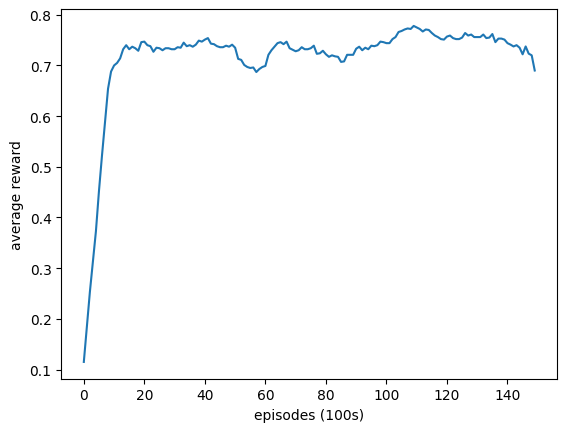

In [7]:
#We can plot the trainig progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+1000]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100s)')
plt.show()